In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
salary_test = pd.read_csv(r'C:\Users\shree\Desktop\subject\Data_Science\DS_Assignments\Datasets\SalaryData_Test.csv')
salary_train = pd.read_csv(r'C:\Users\shree\Desktop\subject\Data_Science\DS_Assignments\Datasets\SalaryData_Train.csv')

In [3]:
salary_test.shape

(15060, 14)

In [4]:
salary_train.shape

(30161, 14)

In [5]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
salary_train.duplicated().sum()

3258

In [8]:
salary_test.duplicated().sum()

930

In [9]:
salary_train.drop_duplicates(inplace =True)
salary_test.drop_duplicates(inplace = True)

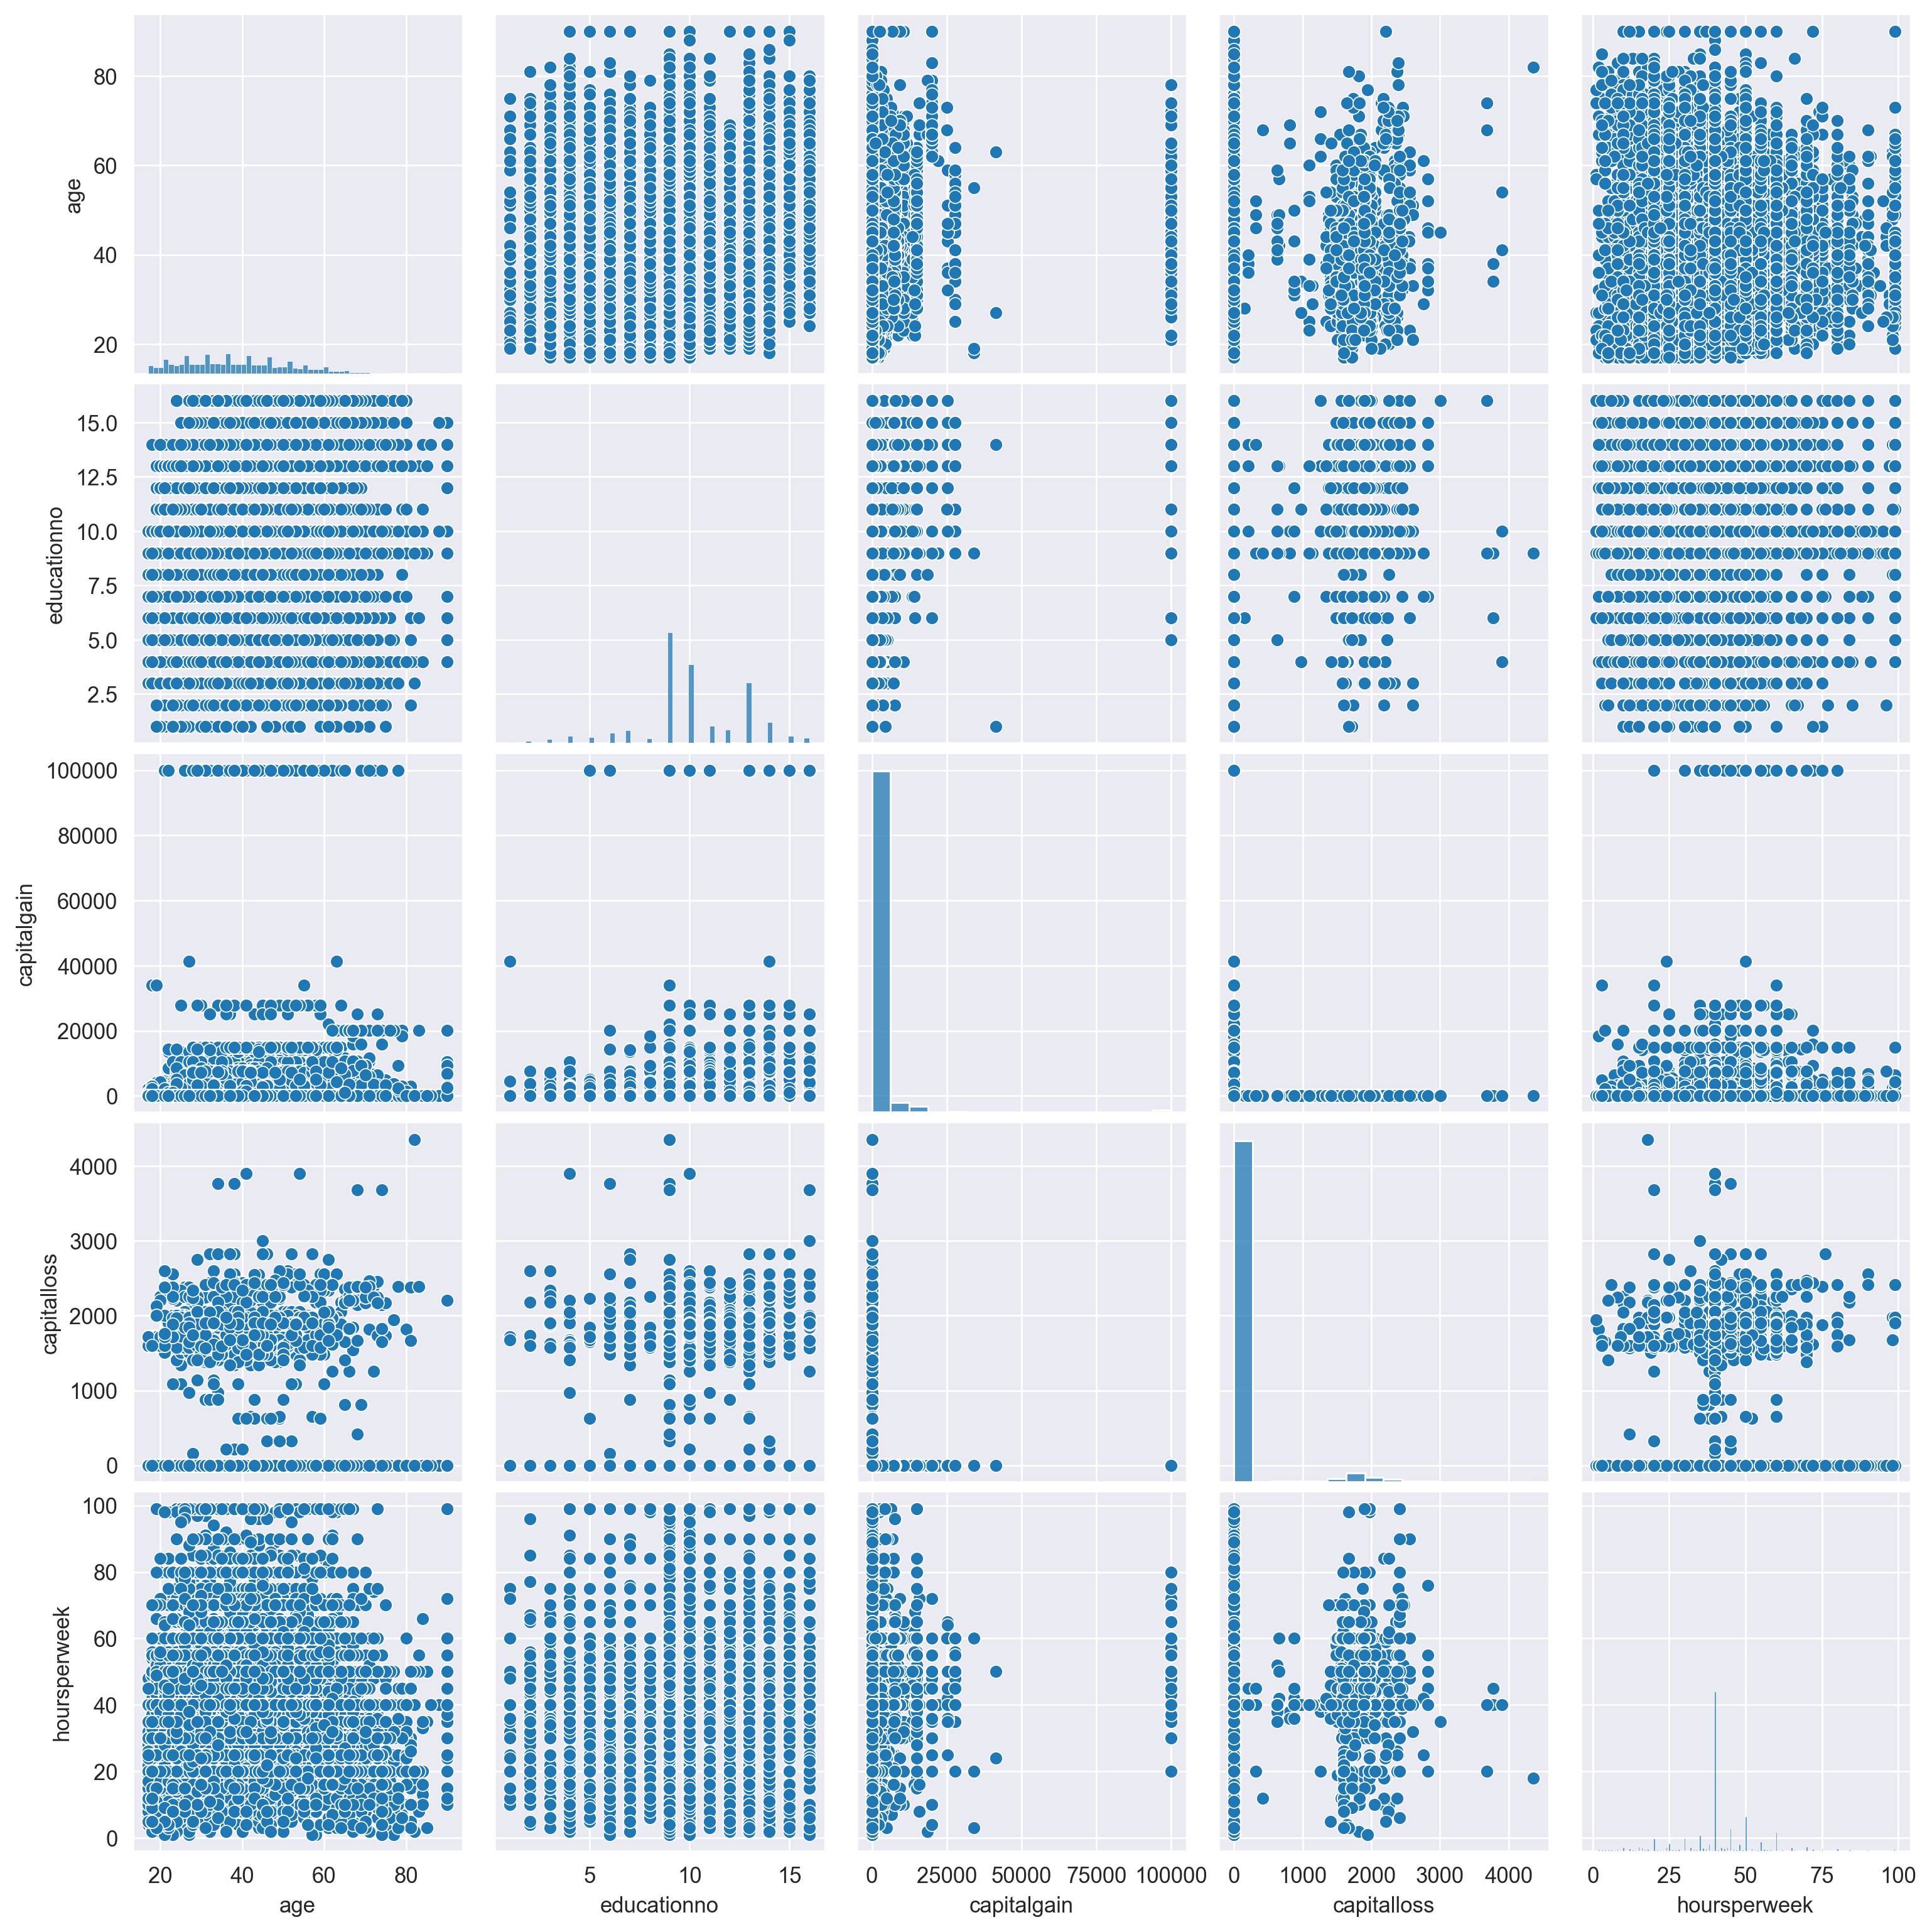

In [10]:
sns.pairplot(salary_train)

In [11]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<Axes: >

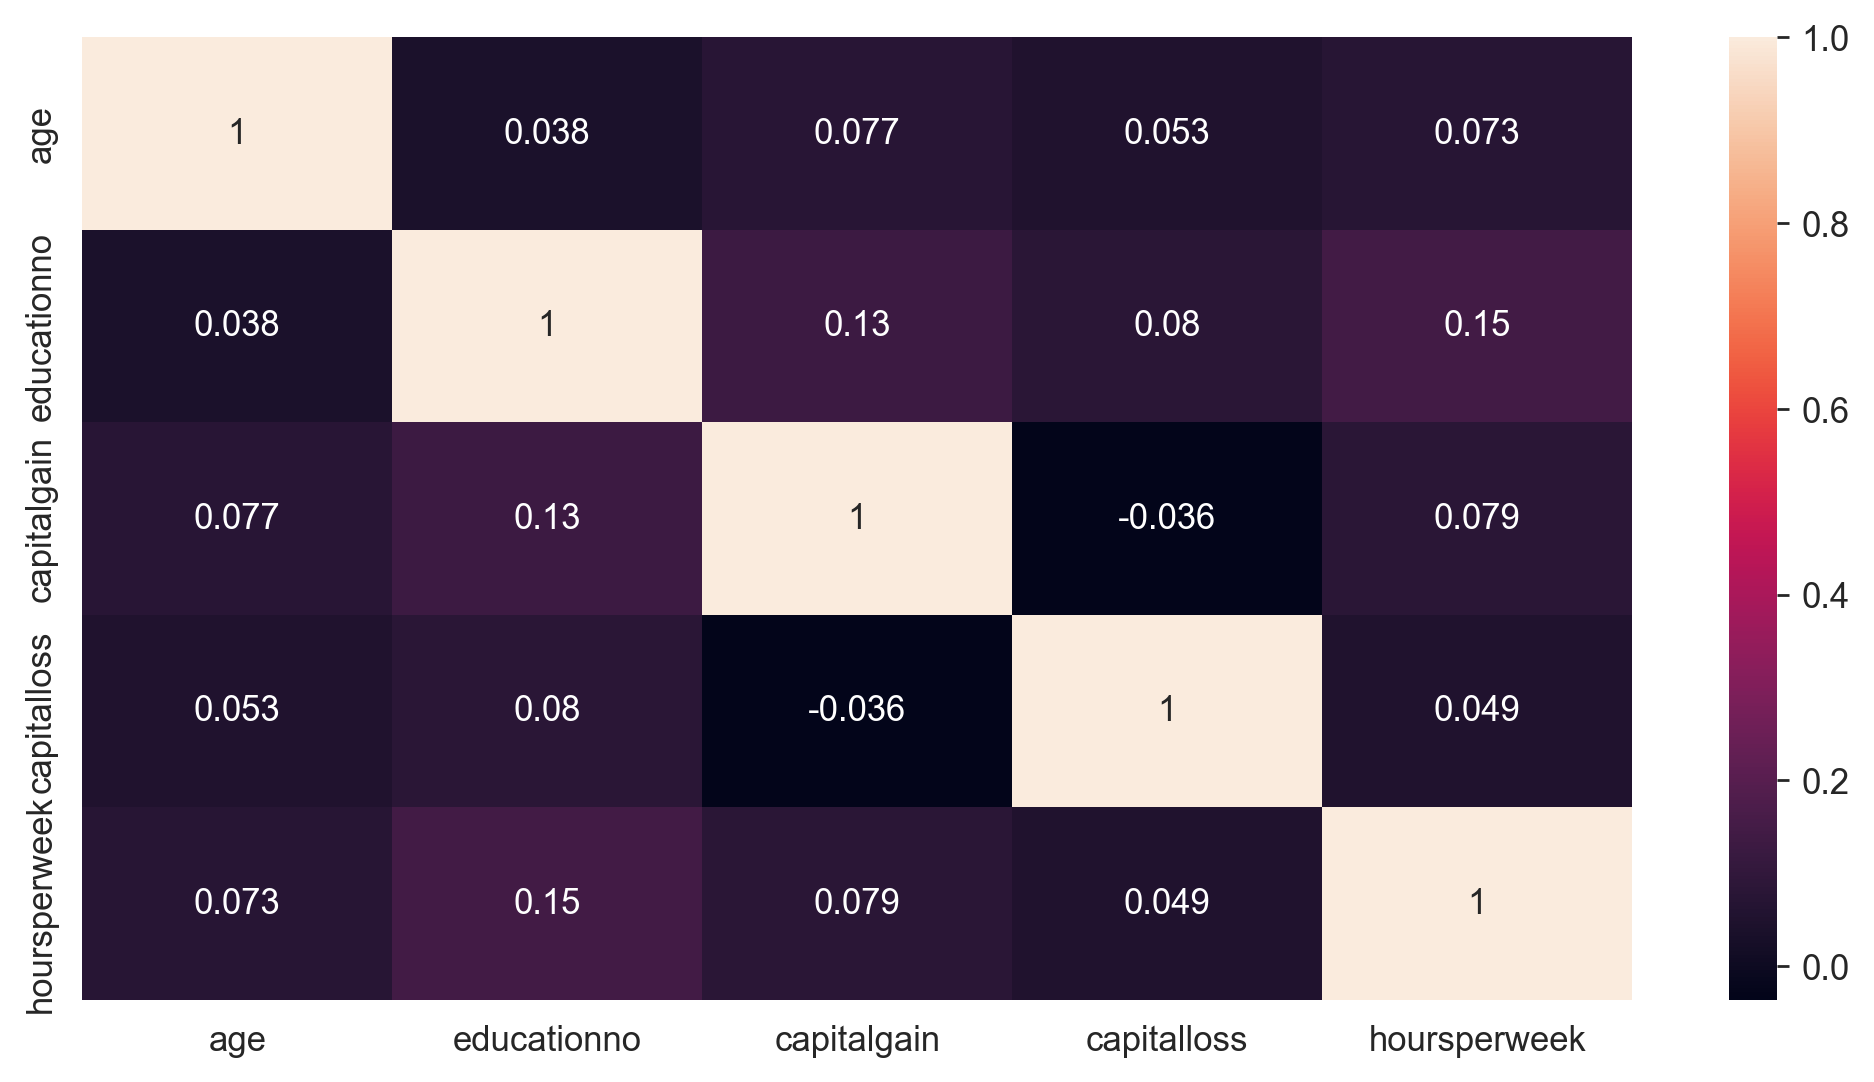

In [12]:
sns.heatmap(salary_train.corr(),annot = True)

## EDA

<Axes: xlabel='age', ylabel='Density'>

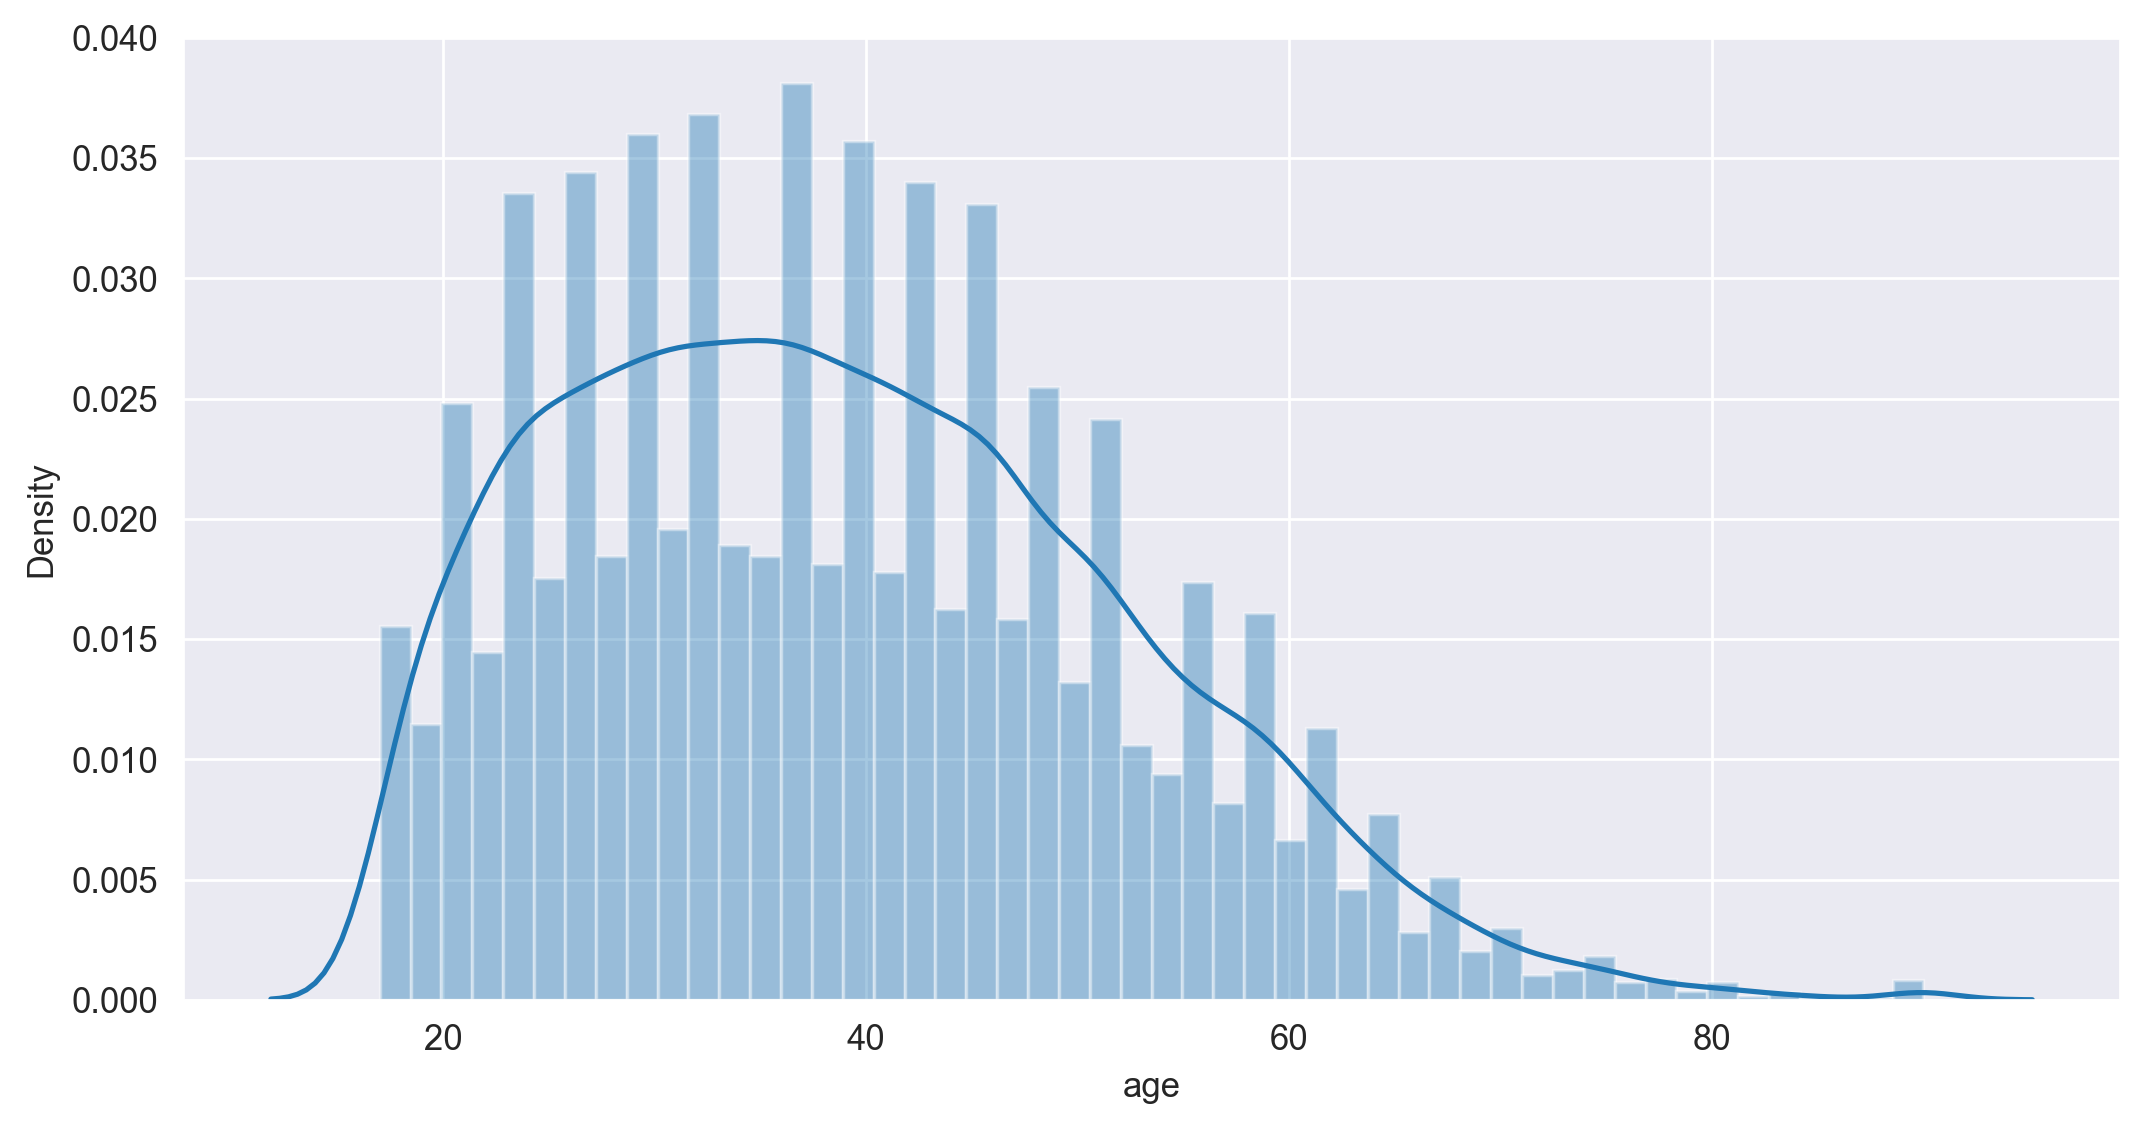

In [13]:
sns.distplot(salary_train['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ee39fe4730>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee39fe4ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee39fe45e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ee39fe5180>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ee39fe5420>],
 'means': []}

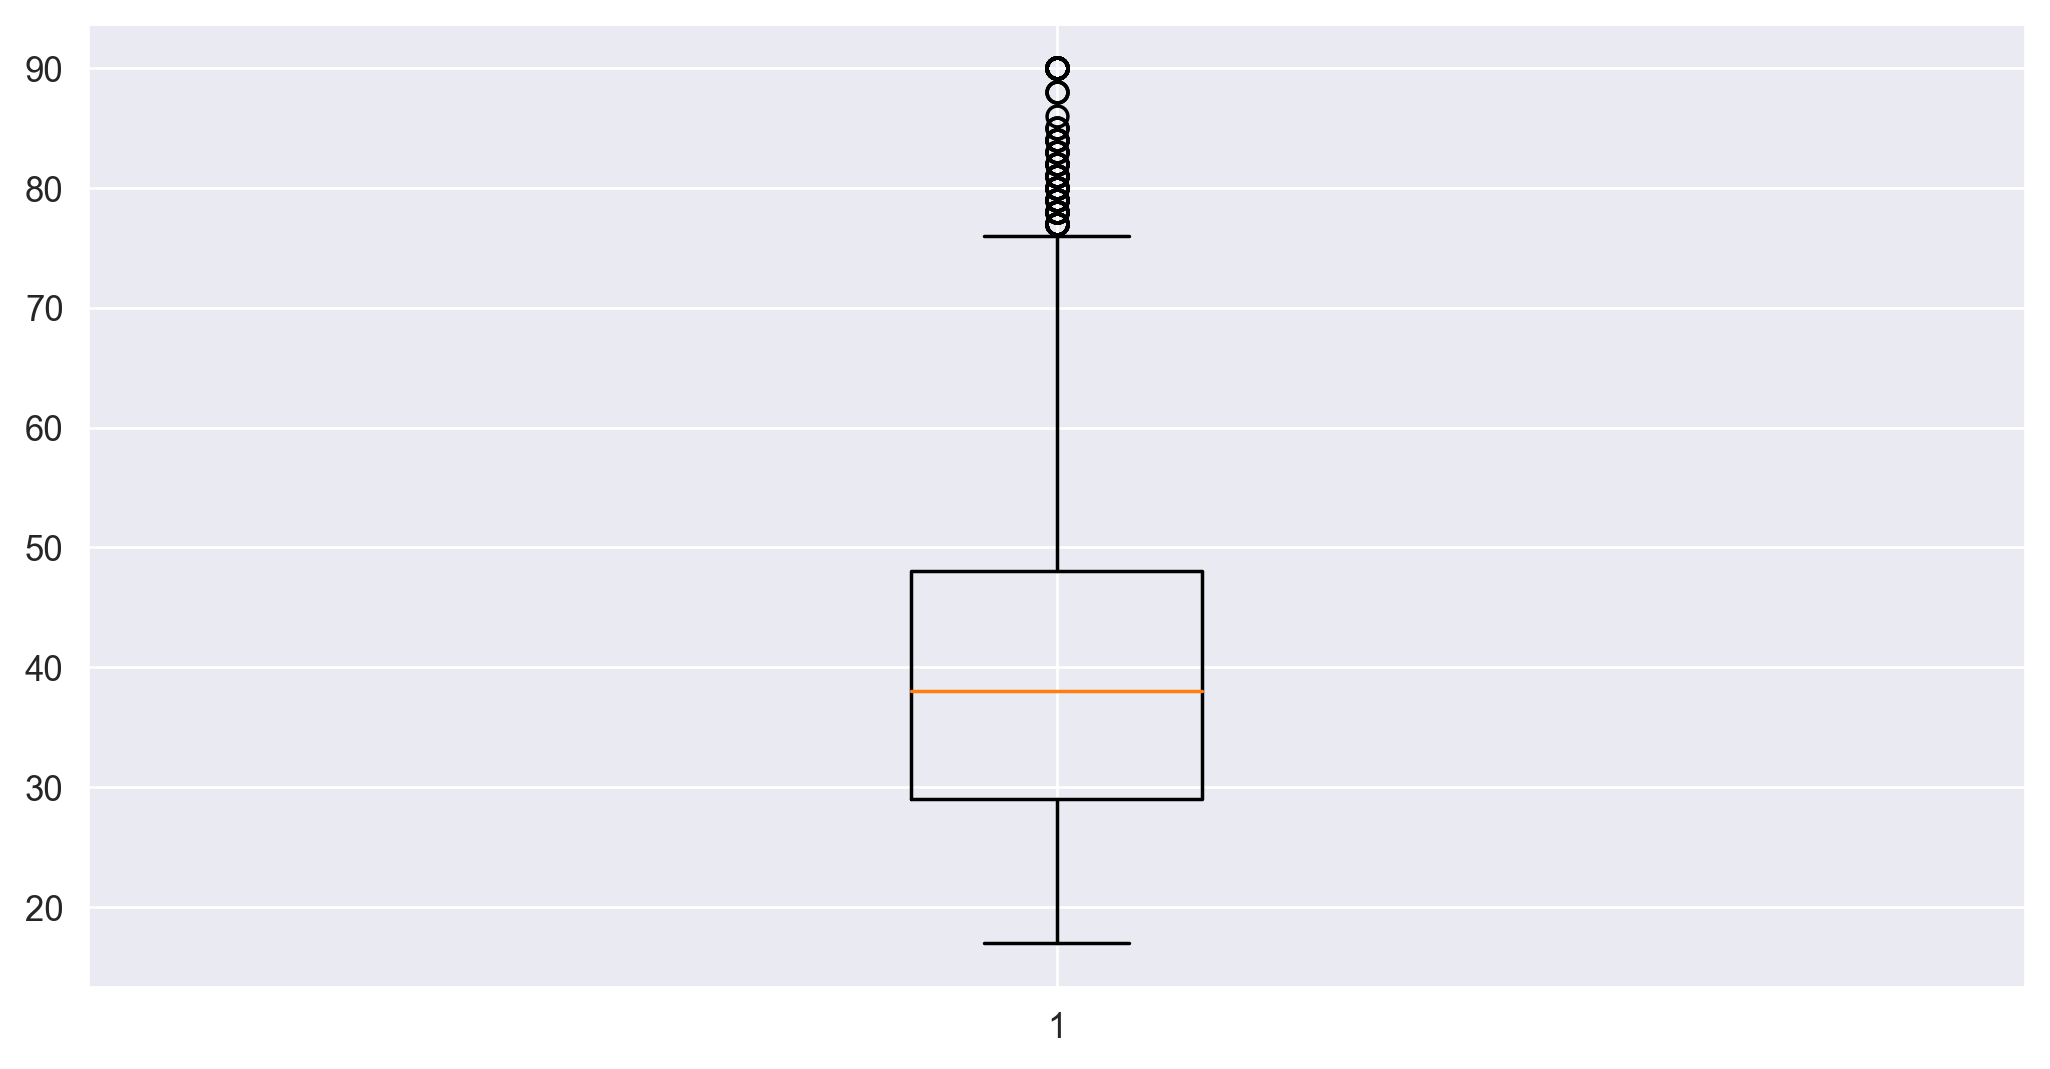

In [14]:
plt.boxplot(salary_train['age'])

In [15]:
def outlier_cap(df,column):
    for index, row in df.iterrows():
        h = df[column].quantile(0.75)
        l = df[column].quantile(0.25)
        IQR = h - l
        upper_threshold = h + 1.5*IQR
        lower_threshold = l - 1.5*IQR
        if row[column] > upper_threshold:
            df.at[index, column] = upper_threshold
        elif row[column] < lower_threshold:
            df.at[index, column] = lower_threshold

In [16]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [17]:
col = ['age','capitalgain','capitalloss', 'hoursperweek']

In [18]:
salary_train['workclass'].value_counts()

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

In [19]:
pd.crosstab(salary_train['workclass'],salary_train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,573,356
Local-gov,1421,593
Private,14902,4311
Self-emp-inc,466,583
Self-emp-not-inc,1733,698
State-gov,914,339
Without-pay,14,0


In [20]:
salary_train['education'].value_counts()

 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ee3a061000>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee3a061540>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee3a060d60>],
 'medians': [<matplotlib.lines.Line2D at 0x1ee3a061a80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ee3a061d20>],
 'means': []}

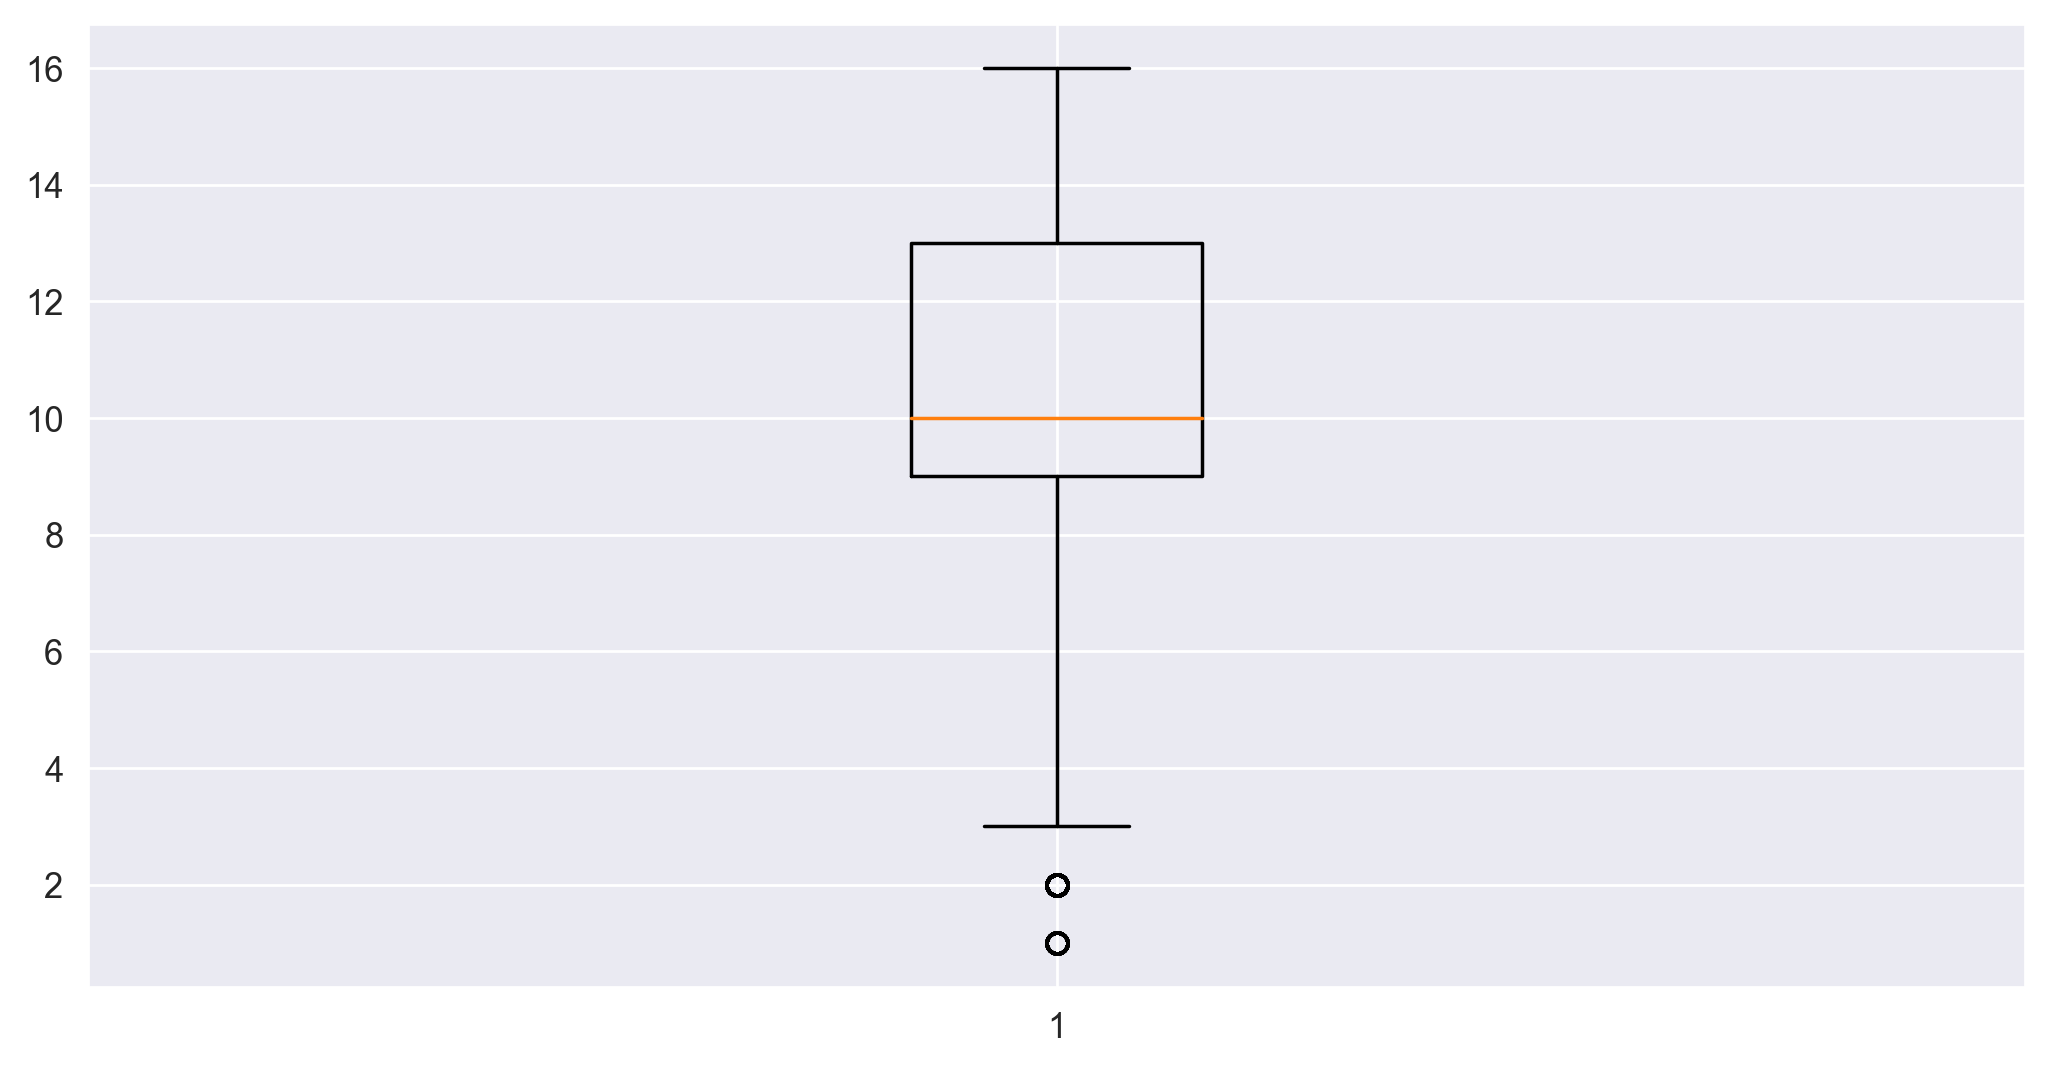

In [21]:
plt.boxplot(salary_train['educationno'])

<Axes: xlabel='educationno', ylabel='Density'>

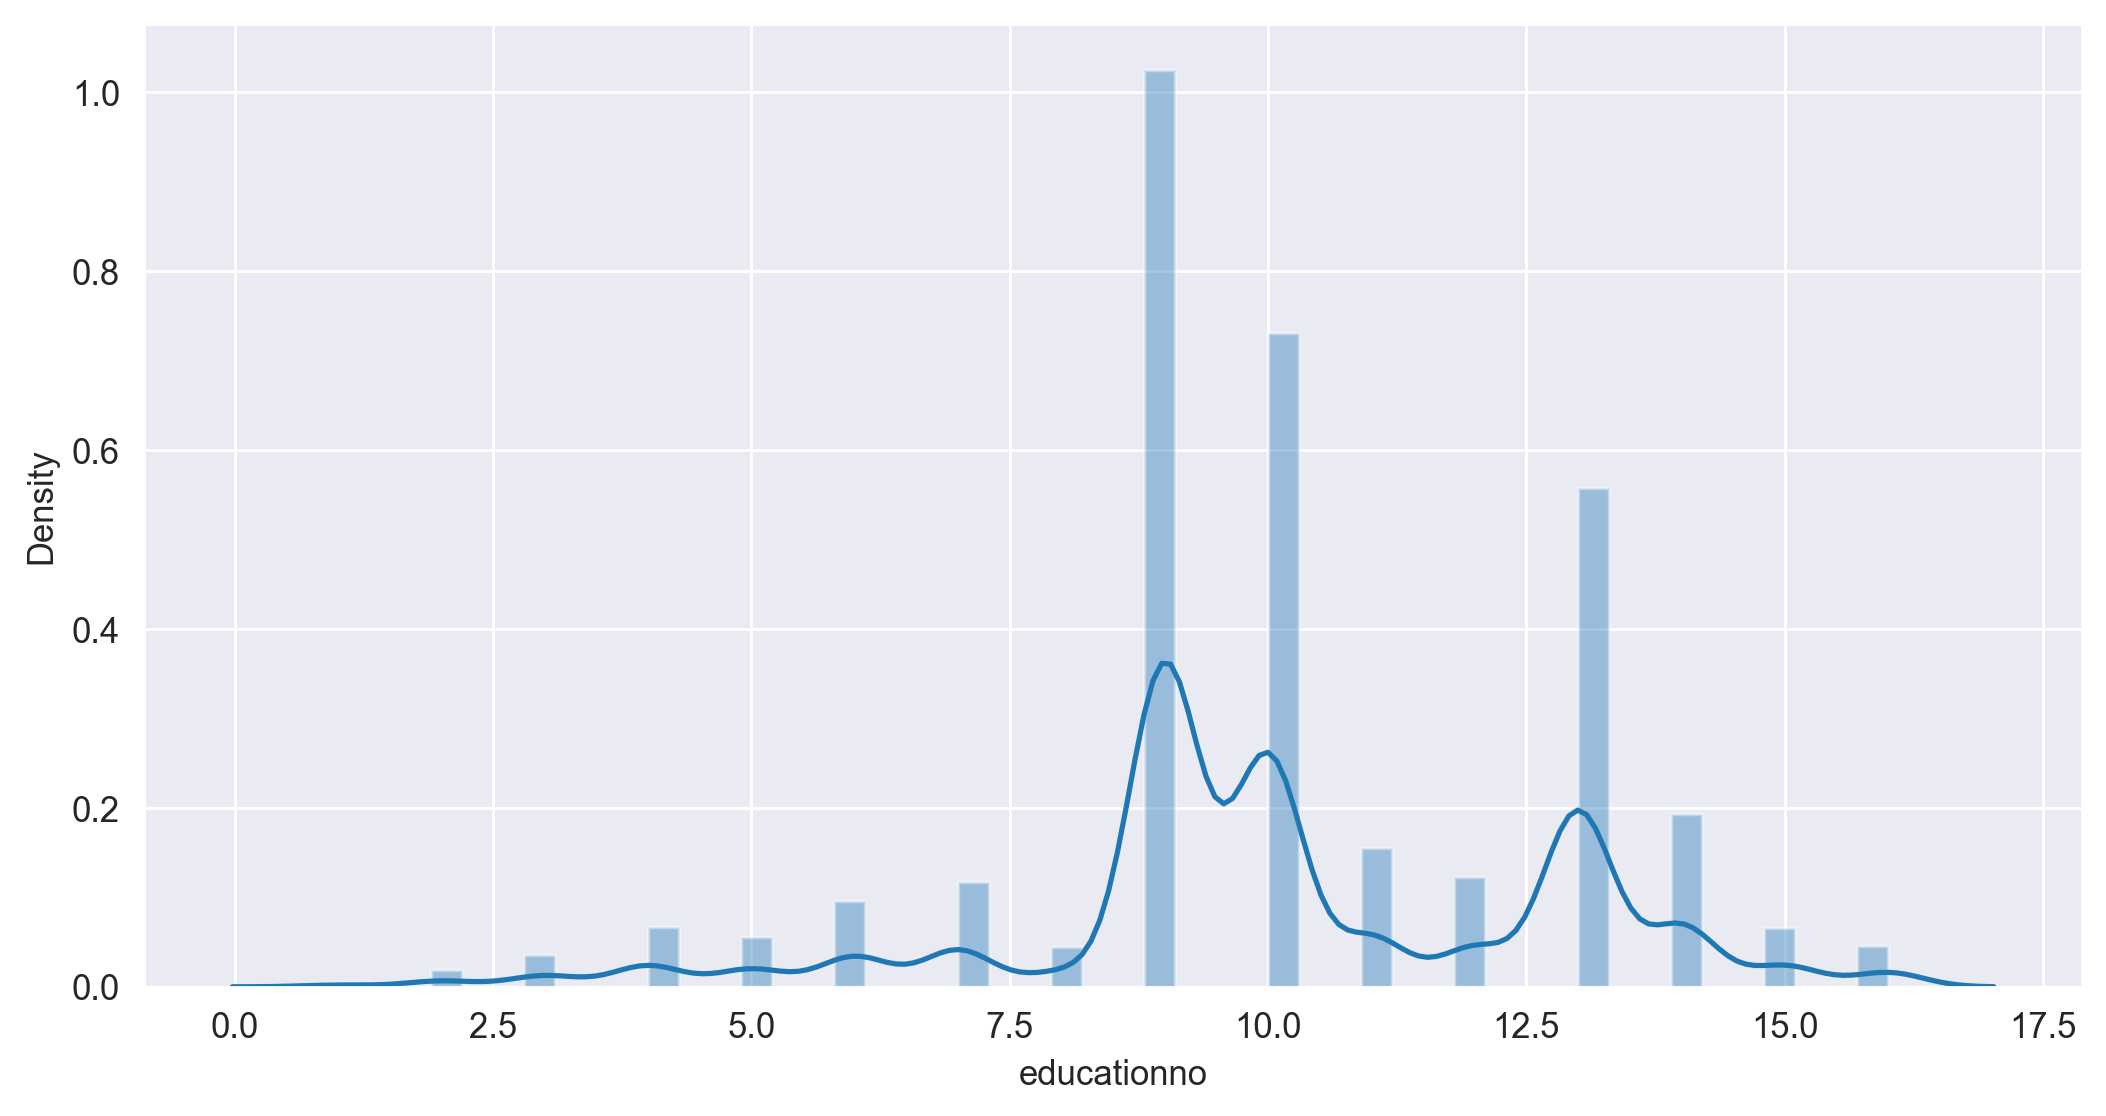

In [22]:
sns.distplot(salary_train['educationno'])

In [23]:
salary_train['maritalstatus'].value_counts()

 Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [24]:
salary_train['occupation'].value_counts()

 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craft-repair         3229
 Sales                3205
 Other-service        2914
 Machine-op-inspct    1665
 Transport-moving     1420
 Handlers-cleaners    1159
 Farming-fishing       957
 Tech-support          858
 Protective-serv       626
 Priv-house-serv       141
 Armed-Forces            9
Name: occupation, dtype: int64

In [25]:
salary_train['relationship'].value_counts()

 Husband           10809
 Not-in-family      7115
 Own-child          3655
 Unmarried          3086
 Wife               1366
 Other-relative      872
Name: relationship, dtype: int64

In [26]:
salary_train['race'].value_counts()

 White                 22758
 Black                  2734
 Asian-Pac-Islander      894
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [27]:
salary_train['sex'].value_counts()

 Male      17961
 Female     8942
Name: sex, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ee3a1be3e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee3a1be920>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee3a1be140>],
 'medians': [<matplotlib.lines.Line2D at 0x1ee3a1bee60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ee3a1bf100>],
 'means': []}

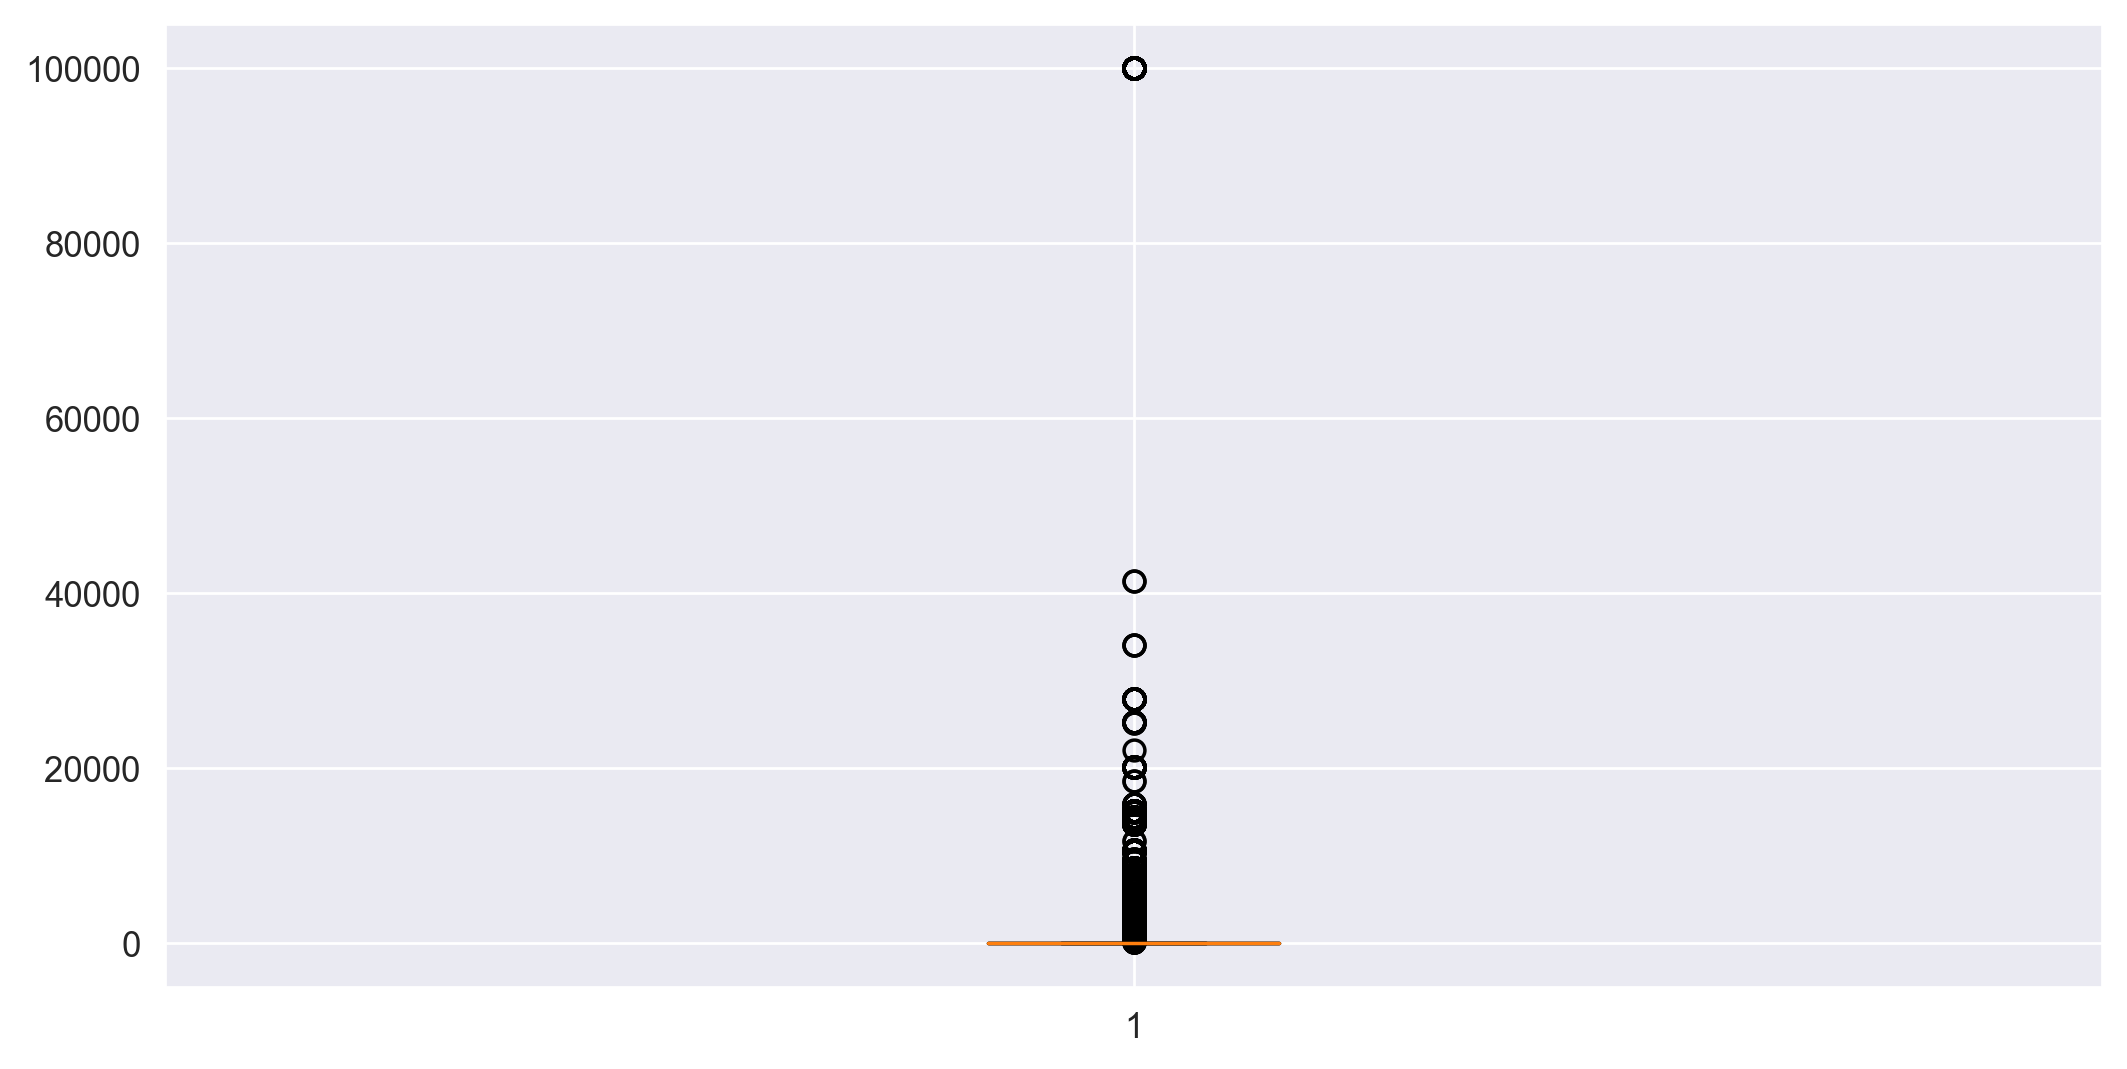

In [28]:
plt.boxplot(salary_train['capitalgain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ee3a24c430>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee3a24c970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee3a24c190>],
 'medians': [<matplotlib.lines.Line2D at 0x1ee3a24ceb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ee3a24d150>],
 'means': []}

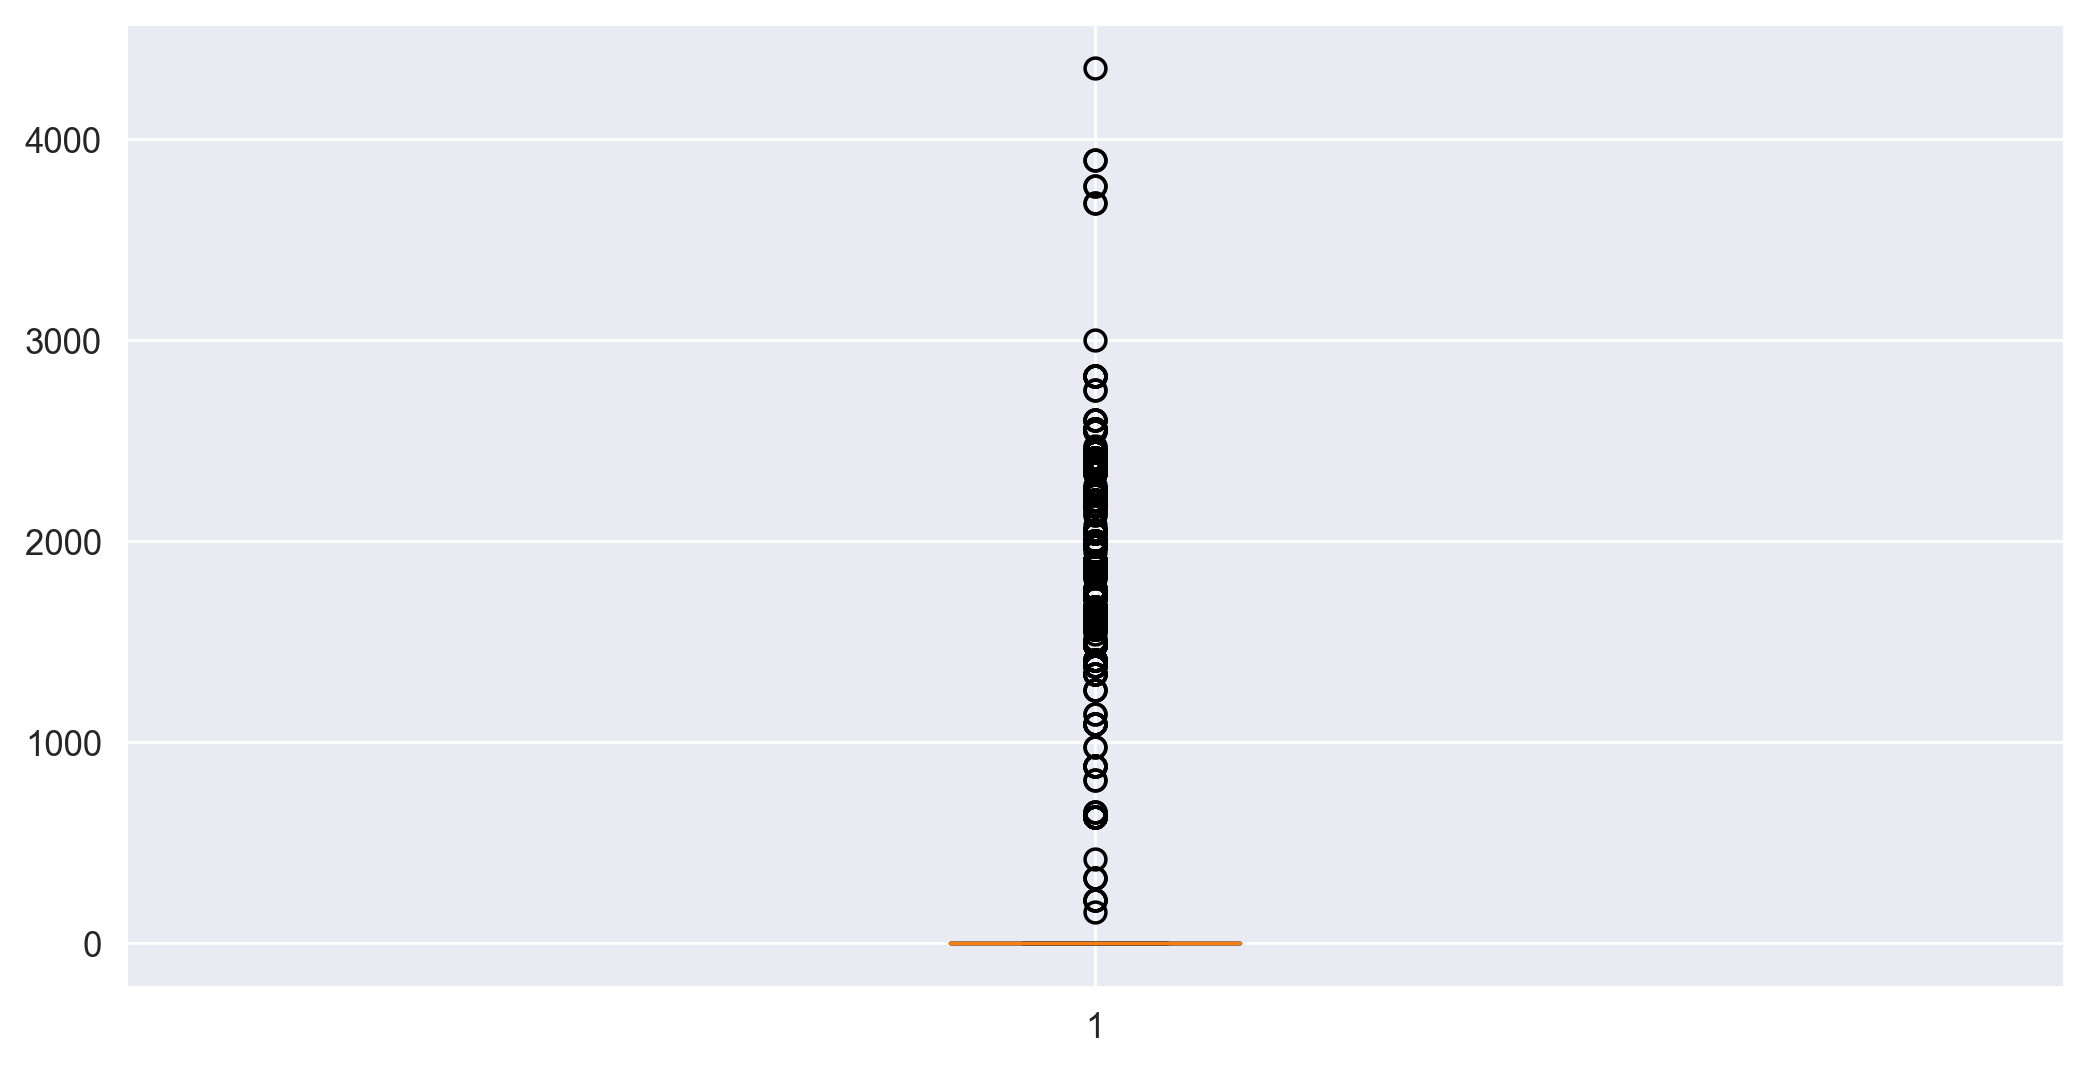

In [29]:
plt.boxplot(salary_train['capitalloss'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ee3a292740>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee3a292b60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee3a2924a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ee3a2930a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ee3a293340>],
 'means': []}

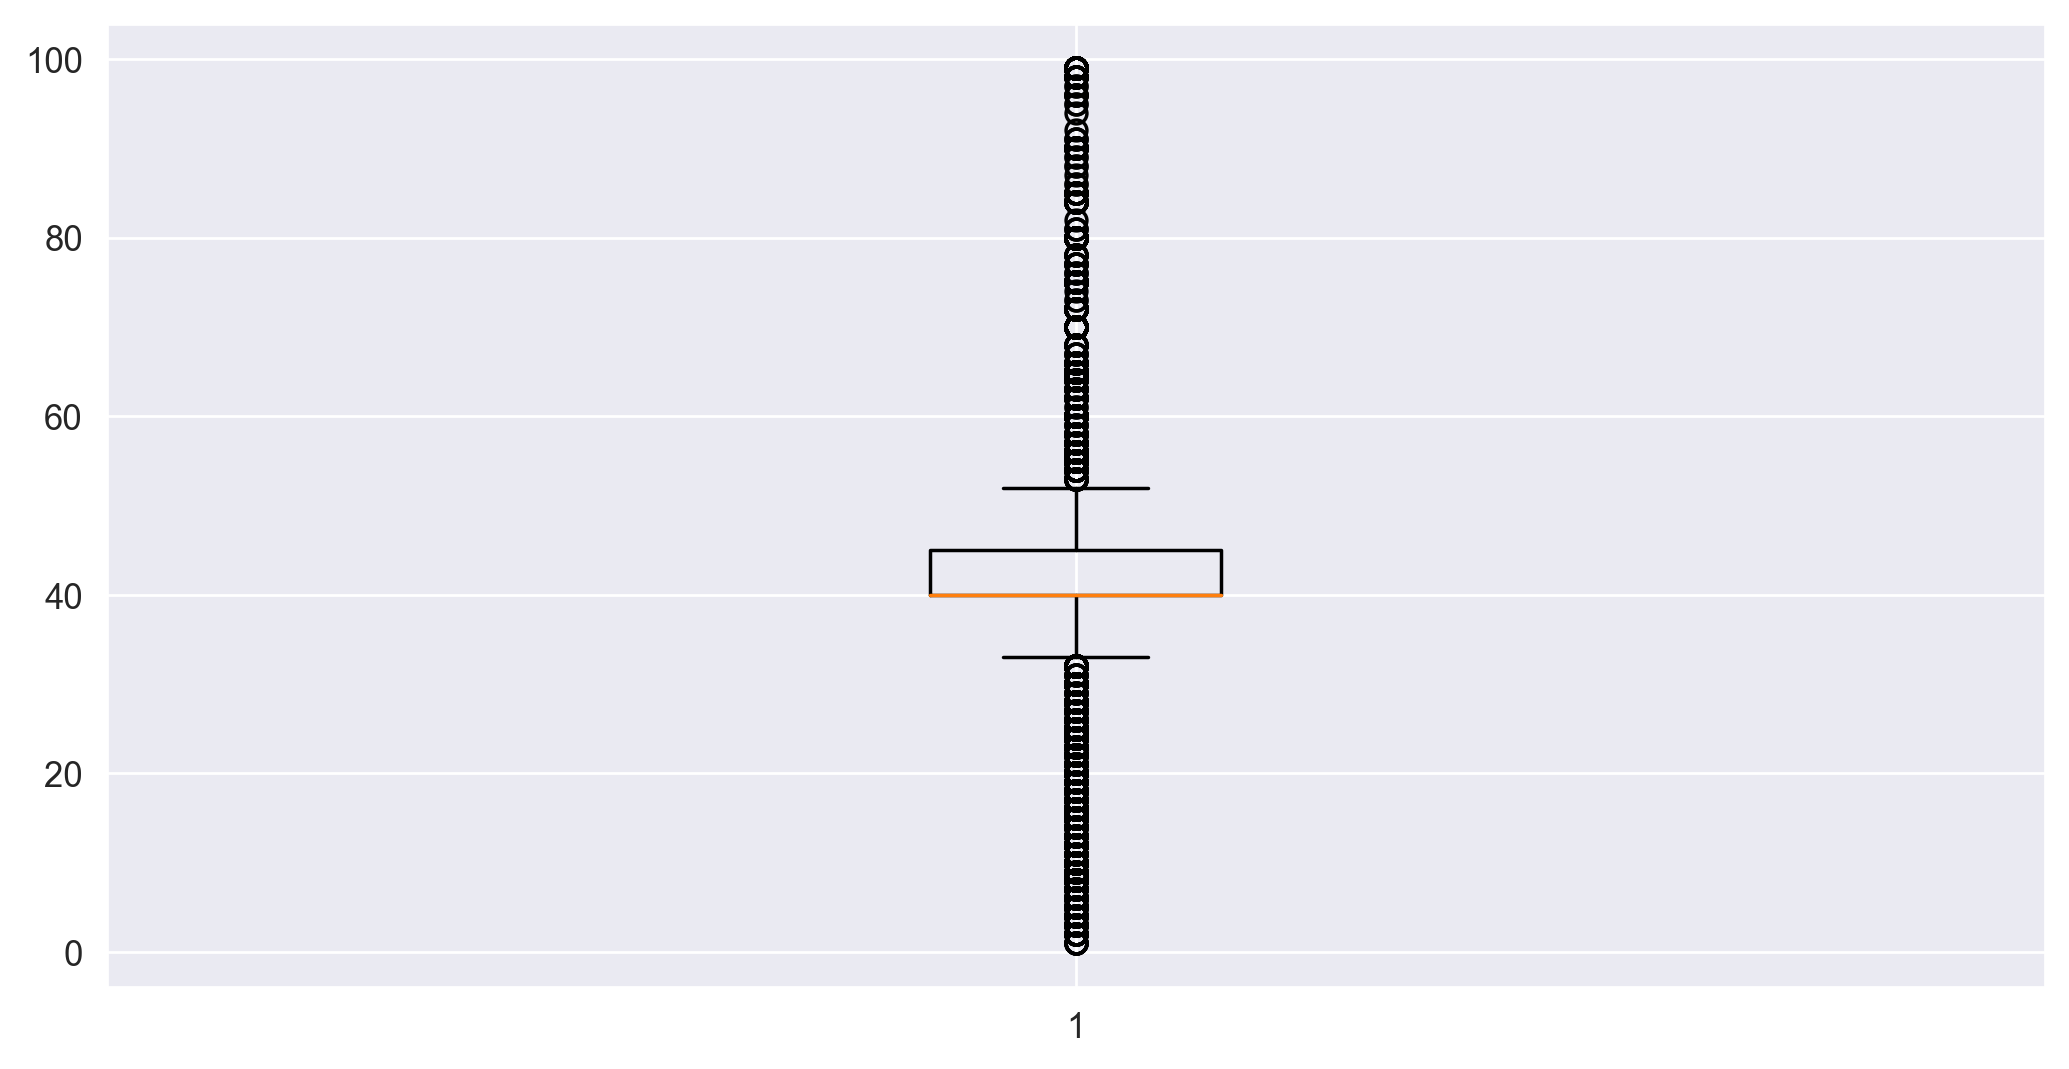

In [30]:
plt.boxplot(salary_train['hoursperweek'])

In [31]:
salary_train['native'].value_counts()

 United-States                 24259
 Mexico                          600
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [32]:
salary_train['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [33]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [35]:
x_train = salary_train.drop(columns = ['Salary'])

In [36]:
x_test = salary_test.drop(columns = ['Salary'])

In [37]:
y_train = salary_train['Salary']

In [38]:
y_test = salary_test['Salary']

In [39]:
le = LabelEncoder()

In [40]:
x_train['education_encoded'] = le.fit_transform(x_train['education'])

In [41]:
x_train.drop(columns = ['education'],inplace = True)

In [42]:
x_train_encoded = pd.get_dummies(x_train, drop_first = True)

In [43]:
x_train_encoded

,age,educationno,capitalgain,capitalloss,hoursperweek,education_encoded,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,9,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,9,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,11,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,9,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,14,0,0,40,12,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30155,22,10,0,0,40,15,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30156,27,12,0,0,38,7,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,11,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
x_test['education_encoded'] = le.fit_transform(x_test['education'])

In [45]:
x_test.drop(columns = ['education'],inplace = True)

In [46]:
x_test_encoded = pd.get_dummies(x_test, drop_first = True)

In [47]:
x_test_encoded

,age,educationno,capitalgain,capitalloss,hoursperweek,education_encoded,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,11,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,7,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,15,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,9,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,9,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,9,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,9,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
y_train_encoded = le.fit_transform(y_train)

In [49]:
y_train_encoded

array([0, 0, 0, ..., 0, 0, 1])

In [50]:
y_test_encoded = le.fit_transform(y_test)

In [51]:
y_test_encoded

array([0, 0, 1, ..., 0, 0, 1])

## Model Building

In [52]:
svc = SVC(kernel = 'rbf')

svc.fit(x_train_encoded,y_train_encoded)
ypred = svc.predict(x_test_encoded)
print(svc.score(x_train_encoded,y_train_encoded))
print(svc.score(x_test_encoded,y_test_encoded))

0.7940378396461362
0.7960368011323425


## ForestFire Data

In [53]:
fires = pd.read_csv(r'C:\Users\shree\Desktop\subject\Data_Science\DS_Assignments\Datasets\forestfires.csv')

In [54]:
fires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [55]:
fires.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [56]:
fires.duplicated().sum()

8

In [57]:
fires =  fires.drop_duplicates()

In [58]:
fires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

In [60]:
data = fires.drop(columns = ['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'])

<Axes: >

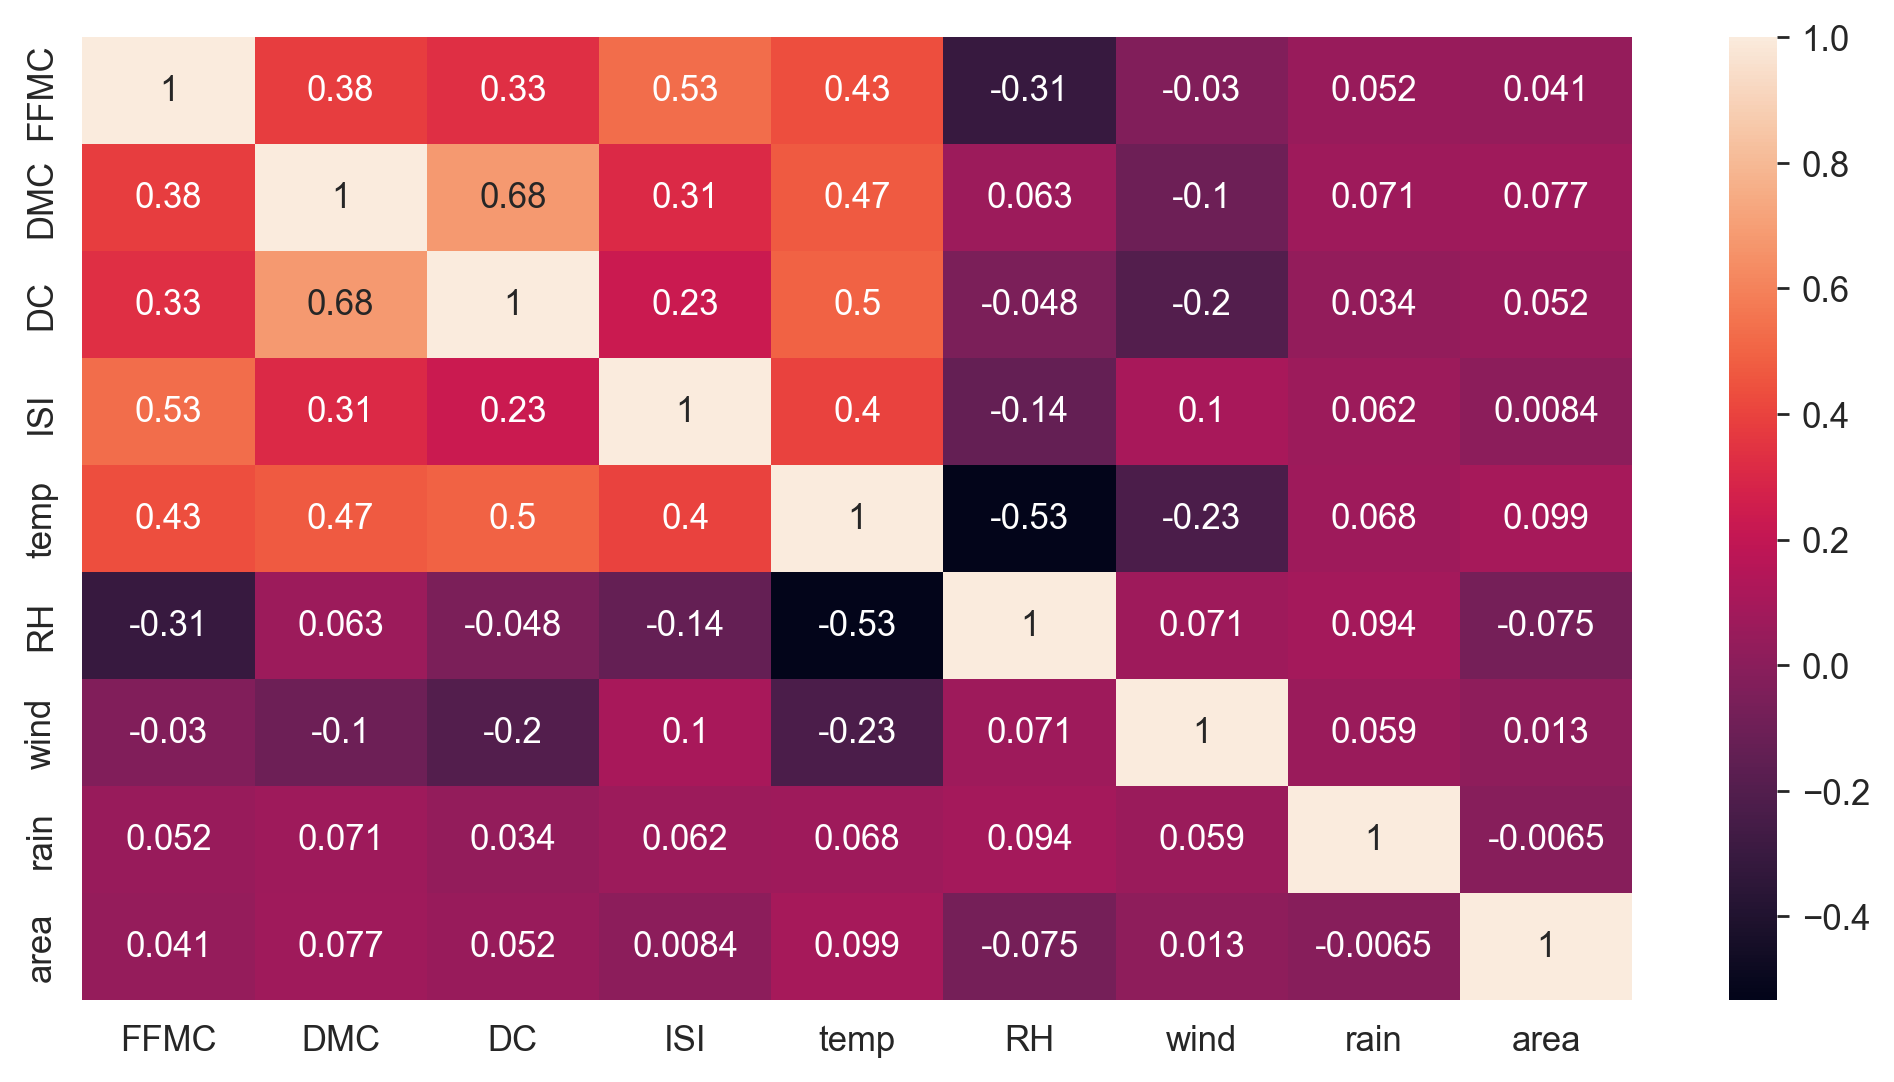

In [61]:
sns.heatmap(data.corr(), annot = True)

In [62]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
fires['size_category']=label.fit_transform(fires['size_category'])

In [63]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [64]:
x = fires.drop(columns = ['month','size_category','day'])
y = fires['size_category']

In [65]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 509, dtype: int32

In [67]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-7.96039810e-01, -1.31838569e+00, -1.82893094e+00, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-3.25665522e-03, -1.17405250e+00,  4.89256926e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       [-3.25665522e-03, -1.04383887e+00,  5.61044929e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       ...,
       [-1.62485856e+00, -8.39889805e-01,  4.75141308e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [ 6.81419706e-01,  5.61083388e-01,  2.69859884e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-2.00323234e+00, -1.68235633e+00, -1.77892132e+00, ...,
         2.25388553e+01, -1.74253759e-01, -7.14412875e-01]])

In [68]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

## Model Building

In [69]:
svc = SVC(kernel = 'rbf')

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.7886977886977887
0.7843137254901961
